In [1]:
import os

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from read_cifar10 import get_cifar_10

In [2]:
def create_dataframe_with_labels(cifar_data, meta_data, batch_type="train"):
    images = []
    labels = []
    label_names = []

    # Extract label names from meta data
    label_names_dict = {
        i: name.decode("utf-8") for i, name in enumerate(meta_data[b"label_names"])
    }

    # Function to process a single batch of data
    def process_batch(batch):
        for i in range(len(batch[b"data"])):
            image_flat = batch[b"data"][i]
            image_red = image_flat[:1024].reshape(32, 32)
            image_green = image_flat[1024:2048].reshape(32, 32)
            image_blue = image_flat[2048:].reshape(32, 32)
            image_reshaped = np.dstack((image_red, image_green, image_blue))
            images.append(image_reshaped)

            label = batch[b"labels"][i]
            labels.append(label)
            label_names.append(label_names_dict[label])

    # Process data based on batch type
    if batch_type == "train":
        for batch in cifar_data[batch_type]:
            process_batch(batch)
    else:  # For test data
        process_batch(cifar_data[batch_type])

    return pd.DataFrame({"image": images, "label": labels, "label_name": label_names})


def display_image_from_df(df, index):
    """
    Display an image from the DataFrame.

    Args:
    df (pd.DataFrame): DataFrame containing the CIFAR-10 data.
    index (int): Index of the image to be displayed.
    """
    # Extract and display the image data directly from the DataFrame
    image_data = df.iloc[index]["image"]

    # Display the image
    plt.imshow(image_data, interpolation="nearest")
    plt.title(f"Label: {df.iloc[index]['label_name']}")
    plt.axis("off")  # Turn off axis numbers
    plt.show()

In [3]:
cifar_10 = get_cifar_10()
train = create_dataframe_with_labels(cifar_10, cifar_10['meta'], batch_type="train")
test = create_dataframe_with_labels(cifar_10, cifar_10['meta'], batch_type="test")

In [6]:
type(train['label'][0])

numpy.int64

In [22]:
train.head()

,image,label,label_name
0,"[[[59, 62, 63], [43, 46, 45], [50, 48, 43], [6...",6,frog
1,"[[[154, 177, 187], [126, 137, 136], [105, 104,...",9,truck
2,"[[[255, 255, 255], [253, 253, 253], [253, 253,...",9,truck
3,"[[[28, 25, 10], [37, 34, 19], [38, 35, 20], [4...",4,deer
4,"[[[170, 180, 198], [168, 178, 196], [177, 185,...",1,automobile


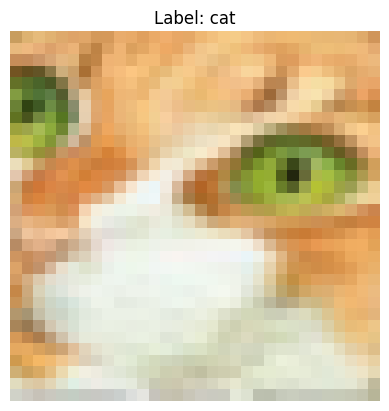

In [26]:
display_image_from_df(test, np.random.randint(10, len(test)))